# Student Performance Indicator ML PROJECT

## Lifecycle of Machine Learning Project
* Understanding the project
* Data collection
* Data checks to perform
* Exploratory data analysis
* Data pre-processing
* Model Training
* Choosing the best Model

# 1)Problem Statement
* This project understands how the student's performance(test scores) is affected by other variables such as Gender,Ethnicity,Parental level of education ,Lunch and Test preparation course

* Hume basically saare parameters ko dhyan me rkhke student ke marks/performance predict krni hai hence its a regression type problem

# 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### Importing necessary libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the csv data as pandas dataFrame

In [43]:
df = pd.read_csv('data/stud.csv')


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
df.shape


(1000, 8)

#  Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# 3) Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

###  Check Missing Values

In [13]:
df.isnull().sum()
#No missing values in the dataset

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
#Check for duplicates
df.duplicated().sum()
#No duplicates found

0

In [15]:
#Check for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
#checking number of unique values in each column
#Like gender me 2 unique values male ya female
#lunch me bhi 2 , race me 5 hai
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
#check stats of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [18]:
#Exploring data
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [19]:
#define numerical and categorical features
#agar object type datatype naa hua to numeric feature otherwise categorical feature
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

#print columns
print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
# Math score,reading score aur writing score ko hta ke ek column bna denge total score
#ek aur column rkhenge average score  
#Basically Feature engineering kii humne

df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
#count kro kitne bacho ka reading score is full and they also have valid average marks
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [22]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Insights:
* from above values we can see that students have performed worst in Maths
* Best in reading section

# 4) Exploring data(visualization):

## Visualize average score distribution to make some conclusions
* Histogram
* Kernel Distribution Function(KDE)

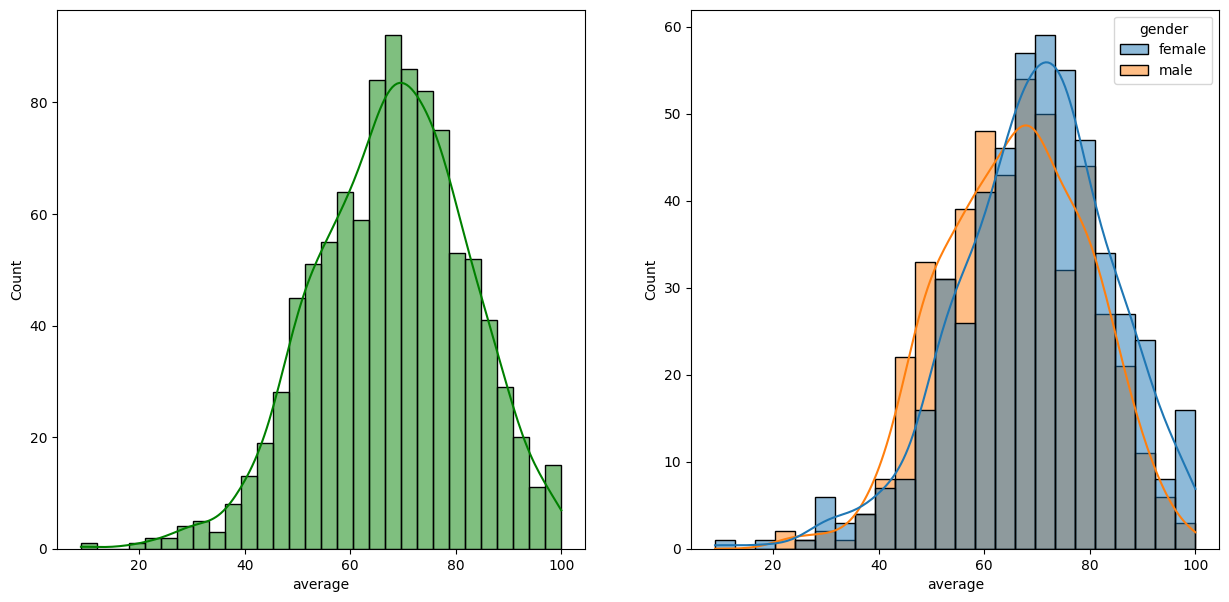

"\nsns.histplot(...): Similar to above, but:\n\nAdds hue='gender': Splits the histogram by the gender column.\n\nYou'll see different colors for different genders (e.g., Male and Female) to compare their average distributions.\n\n"

In [23]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


'''
plt.subplots(1, 2, figsize=(15, 7)): Creates 1 row and 2 columns of subplots.

fig is the overall figure object.

axs is a list of the two axes (the two subplots).

figsize=(15, 7) sets the size of the whole figure'''


'''
plt.subplot(121): Tells Matplotlib to plot on subplot 1 (i.e., first of the 2).

This notation means "1 row, 2 columns, plot on the 1st one".

sns.histplot(...): Plots a histogram of the average column.

bins=30: 30 bars in the histogram.

kde=True: Adds a Kernel Density Estimate line to show distribution shape.

color='g': Makes the bars green.'''


'''
sns.histplot(...): Similar to above, but:

Adds hue='gender': Splits the histogram by the gender column.

You'll see different colors for different genders (e.g., Male and Female) to compare their average distributions.

'''
#First graph is for average marks of all students
# second graph is for average with respect to male and female

# InsightS:
#### FEMALES KA AVERAGE > MALES KA AVERAGE SCORE
##### FEMALES TEND TO PERFORM BETTER THAN THEIR MALE COUNTERPARTS

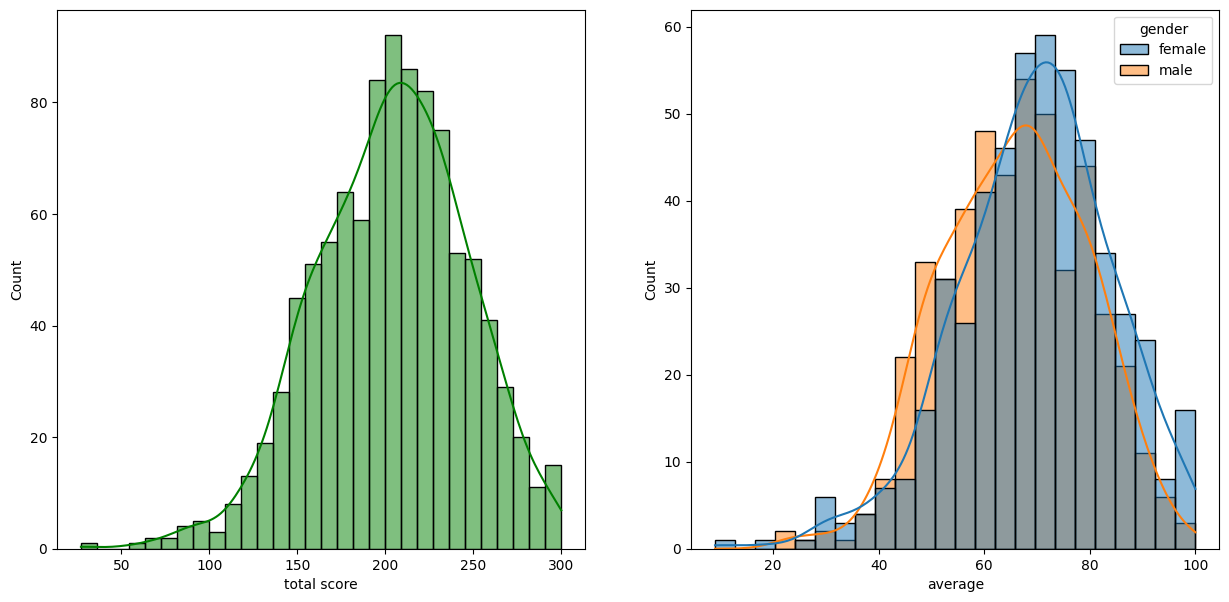

In [24]:
#Total score kaisa rha bacho ka aur males and females ka total score kaisa rha
fig ,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

# Insights:
### Females performed better than males wrt Total scores also

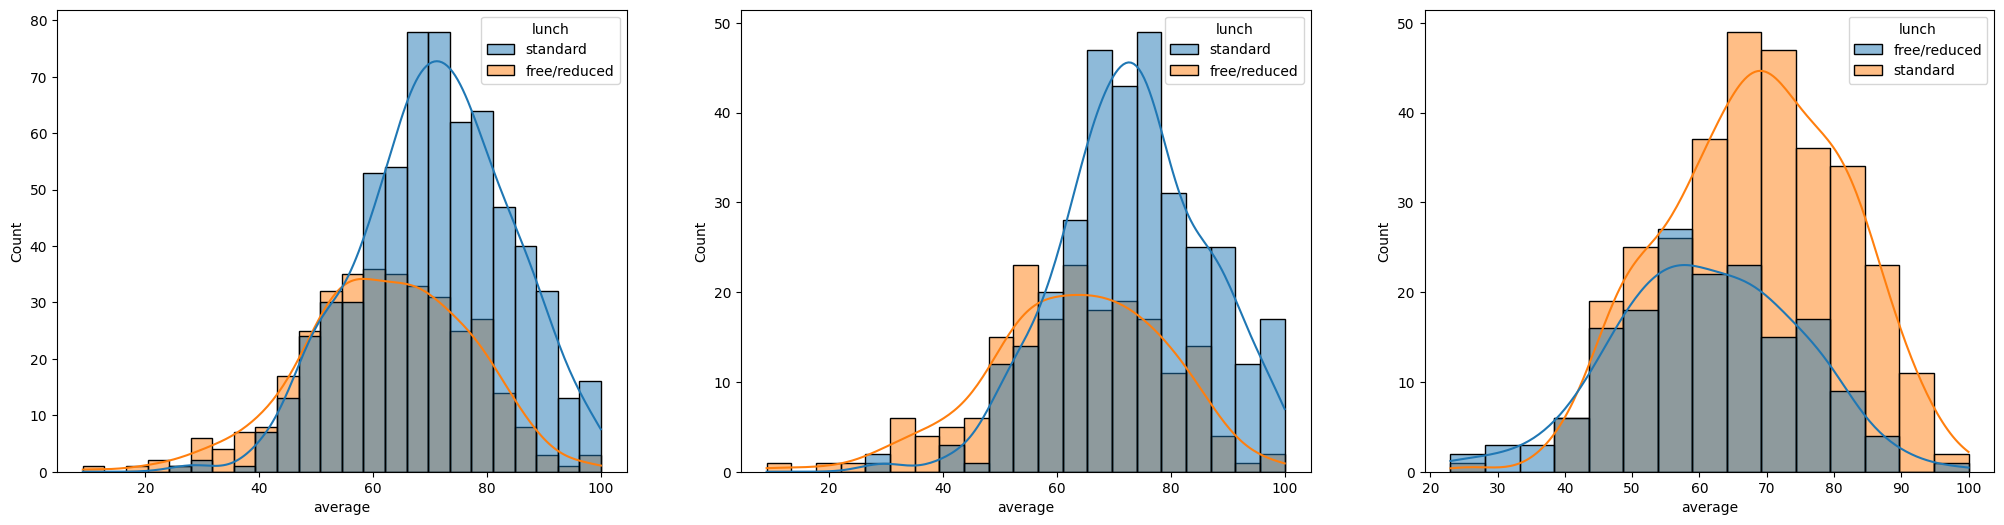

"\nsns.histplot(data=df, x='average', kde=True, hue='lunch')\n\nThis creates a histogram of the average column from the df DataFrame.\n\nkde=True overlays a Kernel Density Estimate curve on the histogram.\n\nhue='lunch' colors the histogram based on the lunch column, which groups the data by lunch type."

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()
'''
sns.histplot(data=df, x='average', kde=True, hue='lunch')

This creates a histogram of the average column from the df DataFrame.

kde=True overlays a Kernel Density Estimate curve on the histogram.

hue='lunch' colors the histogram based on the lunch column, which groups the data by lunch type.'''

#Pehla graph bta rha hai Jin bacho ne Standard Lunch kiya tha be it male or female unka score zyada tha reduced lunch valo se
#Dusra graph bta rha hai Jin ladko ne Standard Lunch kiya tha  unka score zyada tha reduced lunch vale ladko se
#Teesra graph bta rha hai Jin ladkiyo ne Standard Lunch kiya tha  unka score zyada tha reduced lunch vali ladkiyo se

#  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

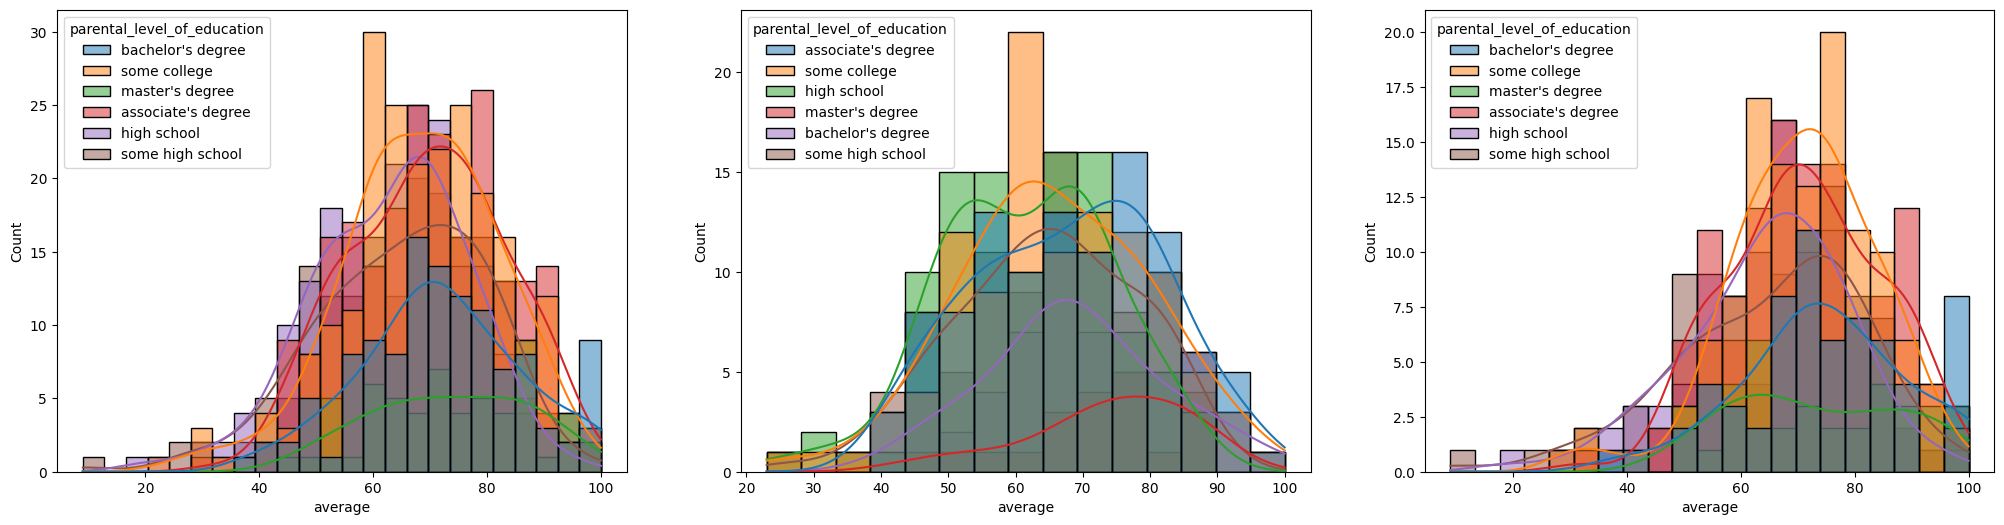

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

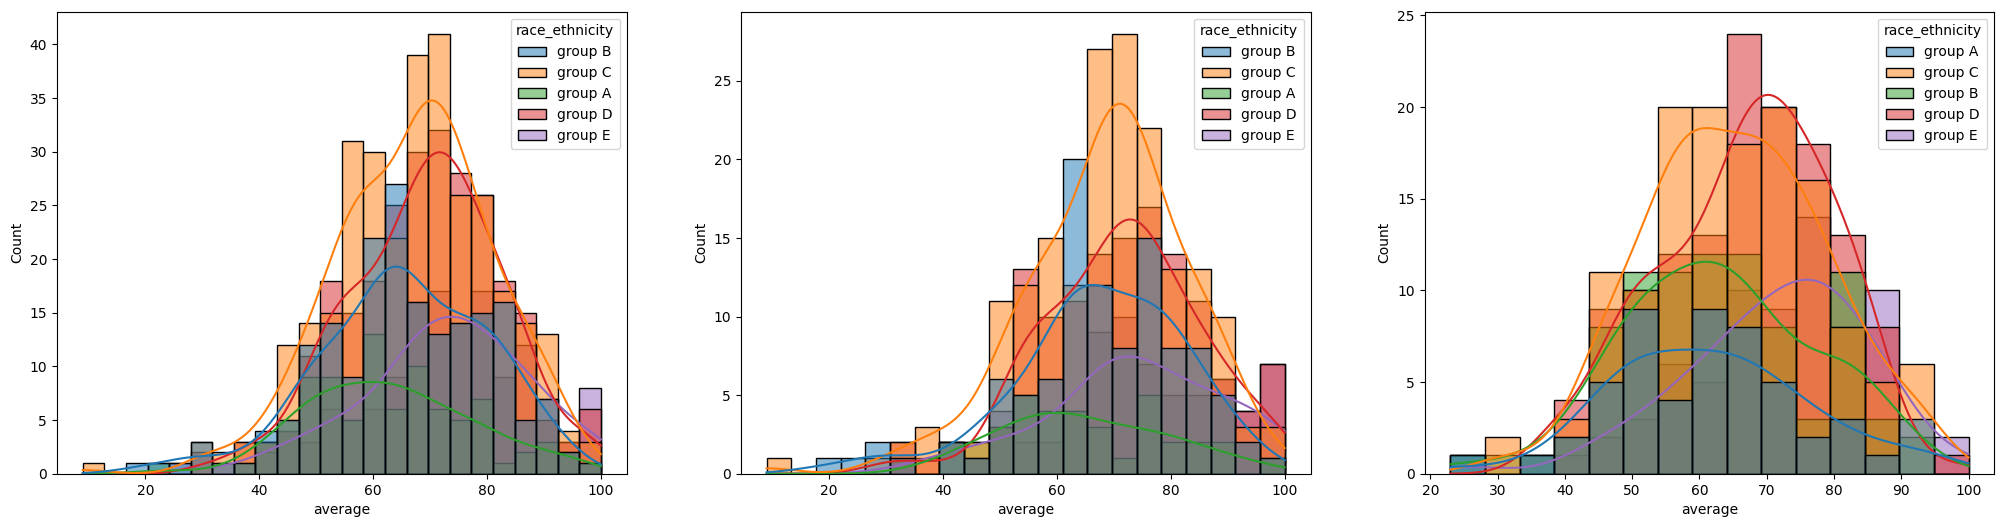

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

# Max score of students in all three subjects

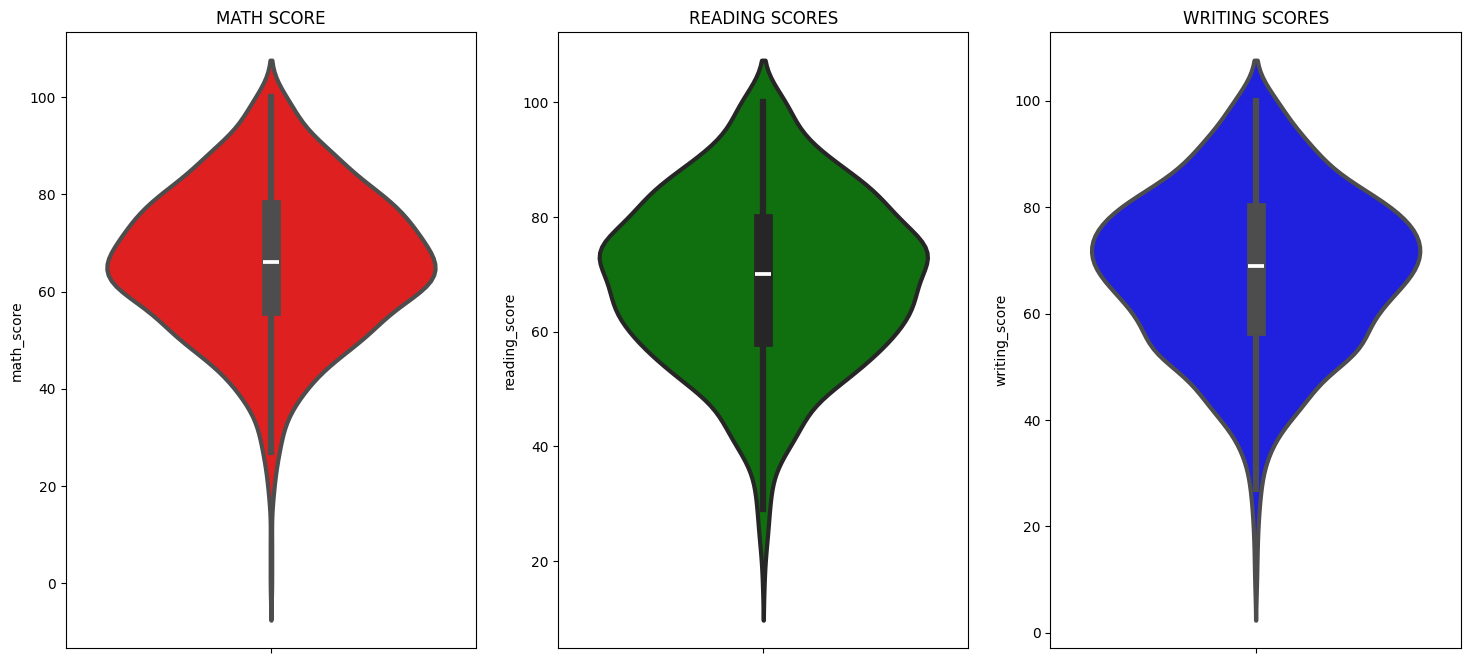

In [28]:
'''
A violin plot is a data visualization that combines a box plot and a KDE (kernel density estimate) plot.
It shows the distribution, central tendency, and spread of the data all in one elegant shape.
'''
'''
What it shows:
Distribution (shape of the data): The wide parts of the violin indicate where the data is more concentrated.

Median and quartiles: Like a box plot, it often includes a white dot for the median, and a box inside showing the interquartile range (IQR), depending on the library settings.

Density: The smooth outline on both sides shows the probability density of the data, helping you see if it's skewed, bimodal, etc.
'''
'''
Why use a violin plot?
To understand the full distribution of data — more detailed than just a boxplot.

To compare distributions between different groups (e.g., male vs. female, different lunch types, etc.).

To spot multiple peaks (modes) or skewed distributions.
'''
'''
If you have a violin plot of math_score:

If it’s wide in the middle → many students scored around that range.

If it's skinny at the top → fewer students got high scores.

If there are two fat sections → you might have a bimodal distribution (two peaks).'''

plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
#plt.subplot(1,3,1) means you're placing this plot in a grid with 1 row and 4 columns, and this is the 1st plot.
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3) #line width yani violin plot ki boundry kitni thick chahiye apko
plt.subplot(1,3,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,3,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

# Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# MultiVariate Analysis using PiePlot
Multivariate Analysis is a set of statistical techniques used to analyze data that involves more than one variable at a time. The goal is to understand relationships, patterns, or influences among multiple variables together — not just one or two at a time.

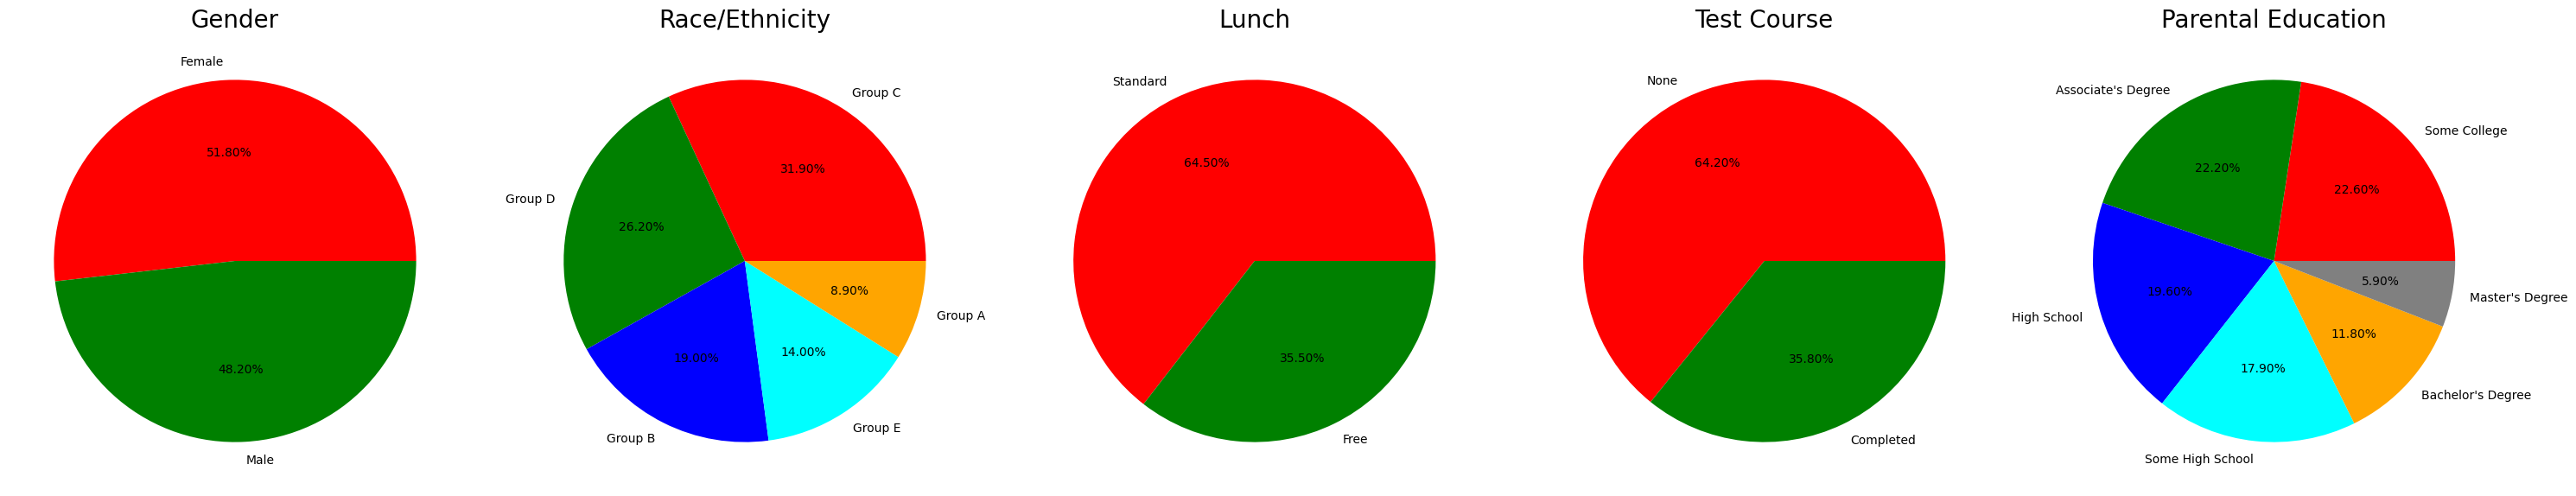

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)
#Pie chart ke size ko set kiya

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
#size variable will be storing kitne males aur kitne females hai total like Female -> 518  , Male -> 482 
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
#size variable , color variable aur labels ko leke chart bnao 
#autopct = '%.2f%%' -> Show the percentage with 2 decimal places and add a % symbol. agar % symbol ni dikhana to end me dono % ke symbol mt lgao
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
#To adjust layout automatically so that nothing overlaps
plt.show()

#  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# 4.4 Feature Wise Visualization
# 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Does gender have any impact on student's performance ?

## UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
Count plot + pie chart — showing the gender distribution using both bar and pie visualizations

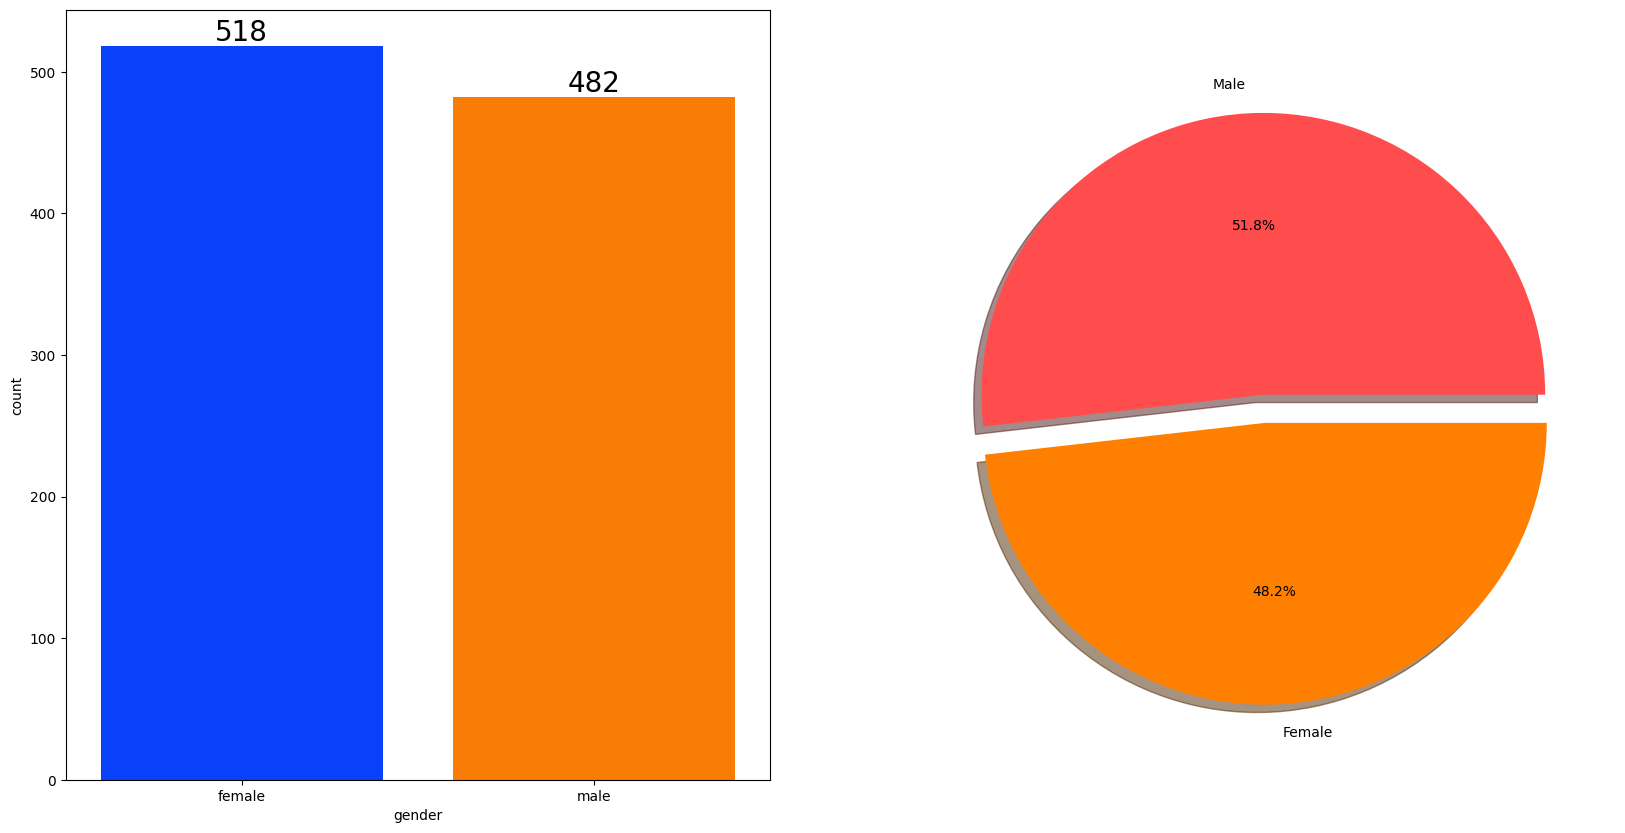

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
'''f, ax = plt.subplots(1, 2, figsize=(20,10))
Creates a figure f with 2 subplots side by side (1 row, 2 columns)
ax is a list-like object holding the two axes: ax[0] and ax[1]
figsize=(20,10) makes the whole figure big and spacious'''
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
'''
Plots a bar chart of gender counts using Seaborn
palette='bright': gives vibrant colors
ax=ax[0]: targets the first subplot
saturation=0.95: slightly mutes the colors (range is 0 to 1)'''
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

'''Adds data labels (counts) on top of each bar
bar_label takes the container of bars and draws count labels on them
color='black' and size=20 make the text large and visible'''
    
plt.pie(
    x=df['gender'].value_counts(), # Counts number of males and females
    labels=['Male','Female'], 
    explode=[0, 0.1], #makes the second region of pieplot bit separate
    autopct='%1.1f%%',  # ek decimal place tk chahiye value hume
    shadow=True, #Need shadow effect thoda sa
    colors=['#ff4d4d','#ff8000'] #colors for pie plot
)
plt.show()

# Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [31]:
gender_group = df.groupby('gender').mean(numeric_only=True)
#Gender ko group kro aur har ek numeric column ka mean nikalo for every gender
#example: math_score of male = 68 , math_score of female = 63 means ki male ka mean score tha 68 aur female ka 63 in maths
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


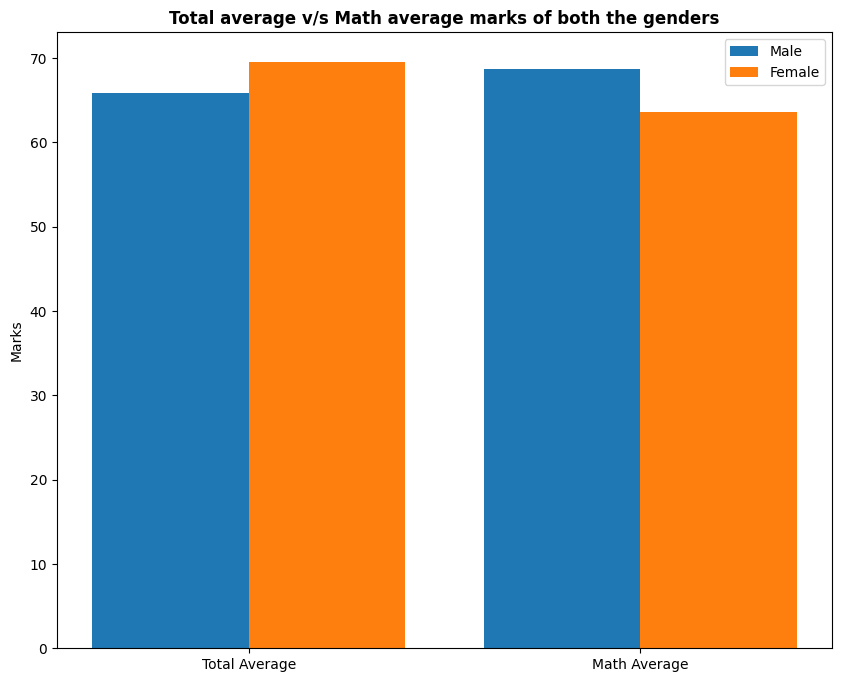

In [32]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
# X ki length hai 2 so ye X axis pe 2 positions bnayega
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
'''
Two bars for each category (grouped bar plot):
Male bars are shifted a bit to the left (-0.2)
Female bars are shifted to the right (+0.2)
0.4 is the width of each bar.'''
  
plt.xticks(X_axis, X) # Sets 'Total Average' and 'Math Average' as x-tick labels
'''
plt.xticks()
xticks stands for x-axis ticks, and it's used to:
Set the positions of the tick marks on the x-axis
Label those tick marks with custom text

'''
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend() 
'''
plt.legend()
This command adds a legend to your plot — a little box that explains what the different colors, shapes, or bars represent.
'''

plt.show()

# Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

# 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Does Race/Ethnicity have any impact on student's performance ?

## UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

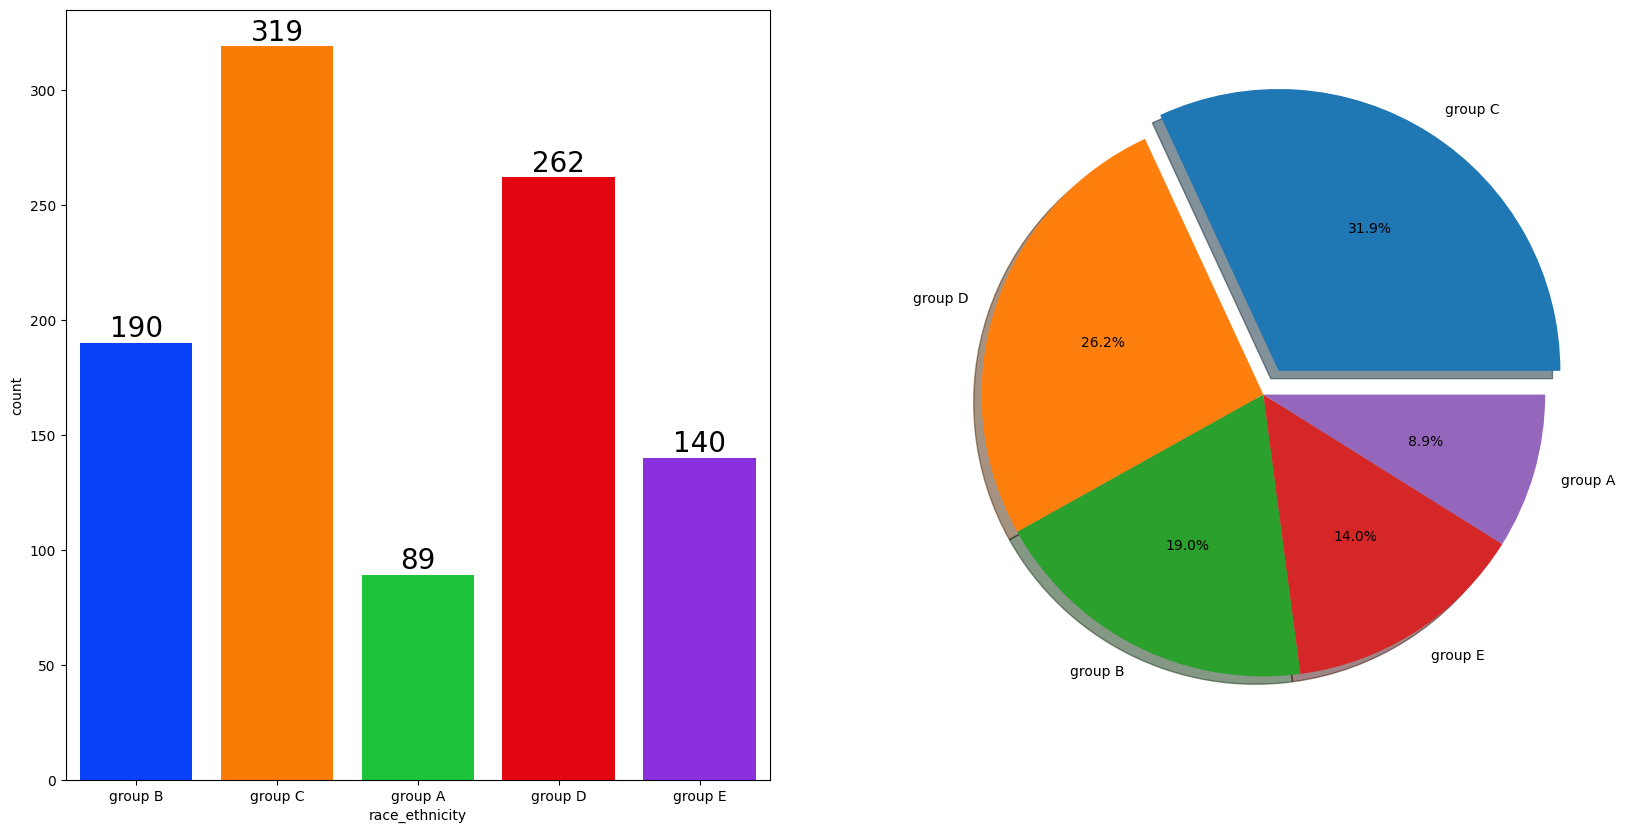

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(
    x = df['race_ethnicity'].value_counts(),
    labels=df['race_ethnicity'].value_counts().index,
    explode=[0.1,0,0,0,0],
    autopct='%1.1f%%',
    shadow=True
    )
plt.show()   

### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

## BIVARIATE ANALYSIS ( Does Race/Ethnicity have any impact on student's performance ? )

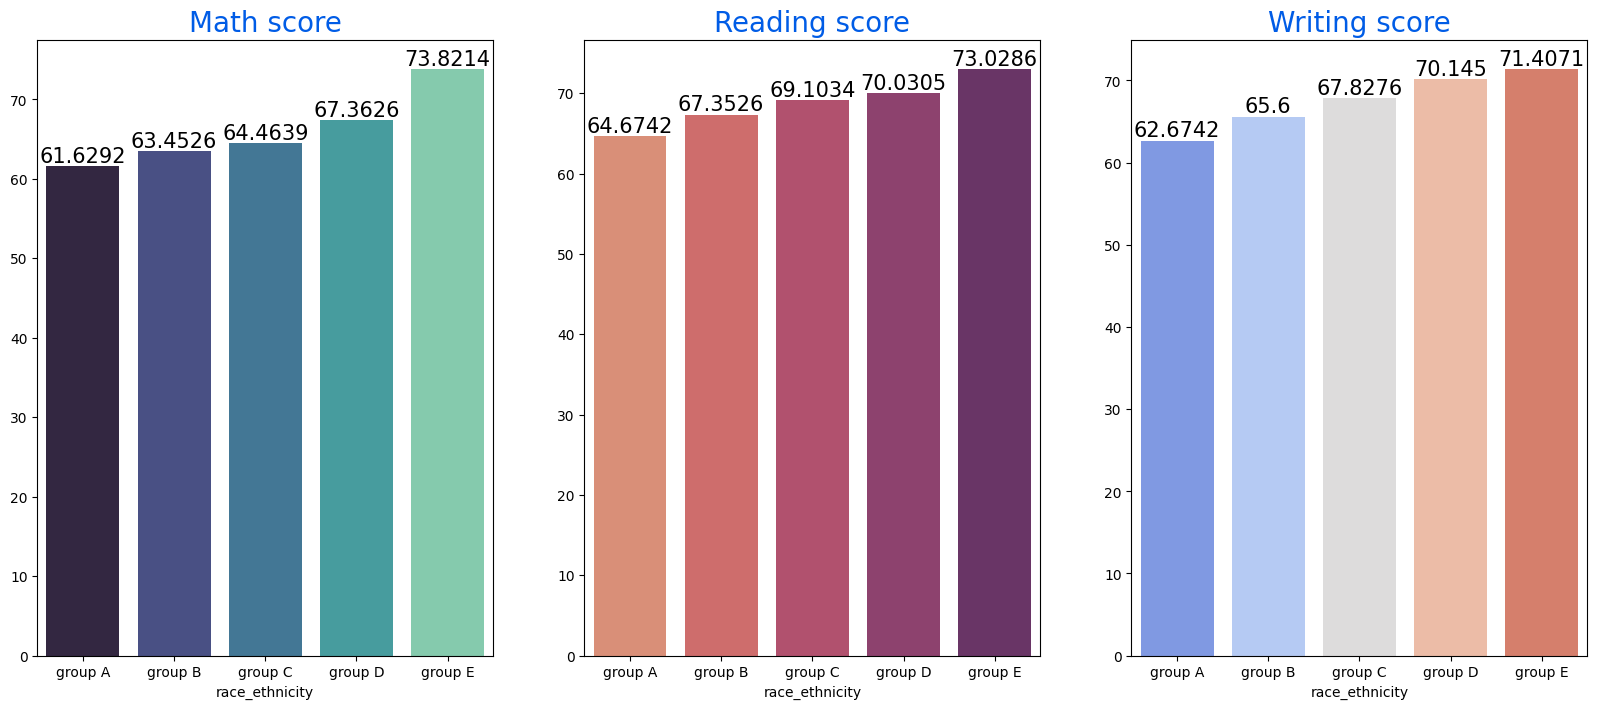

In [34]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 

## 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

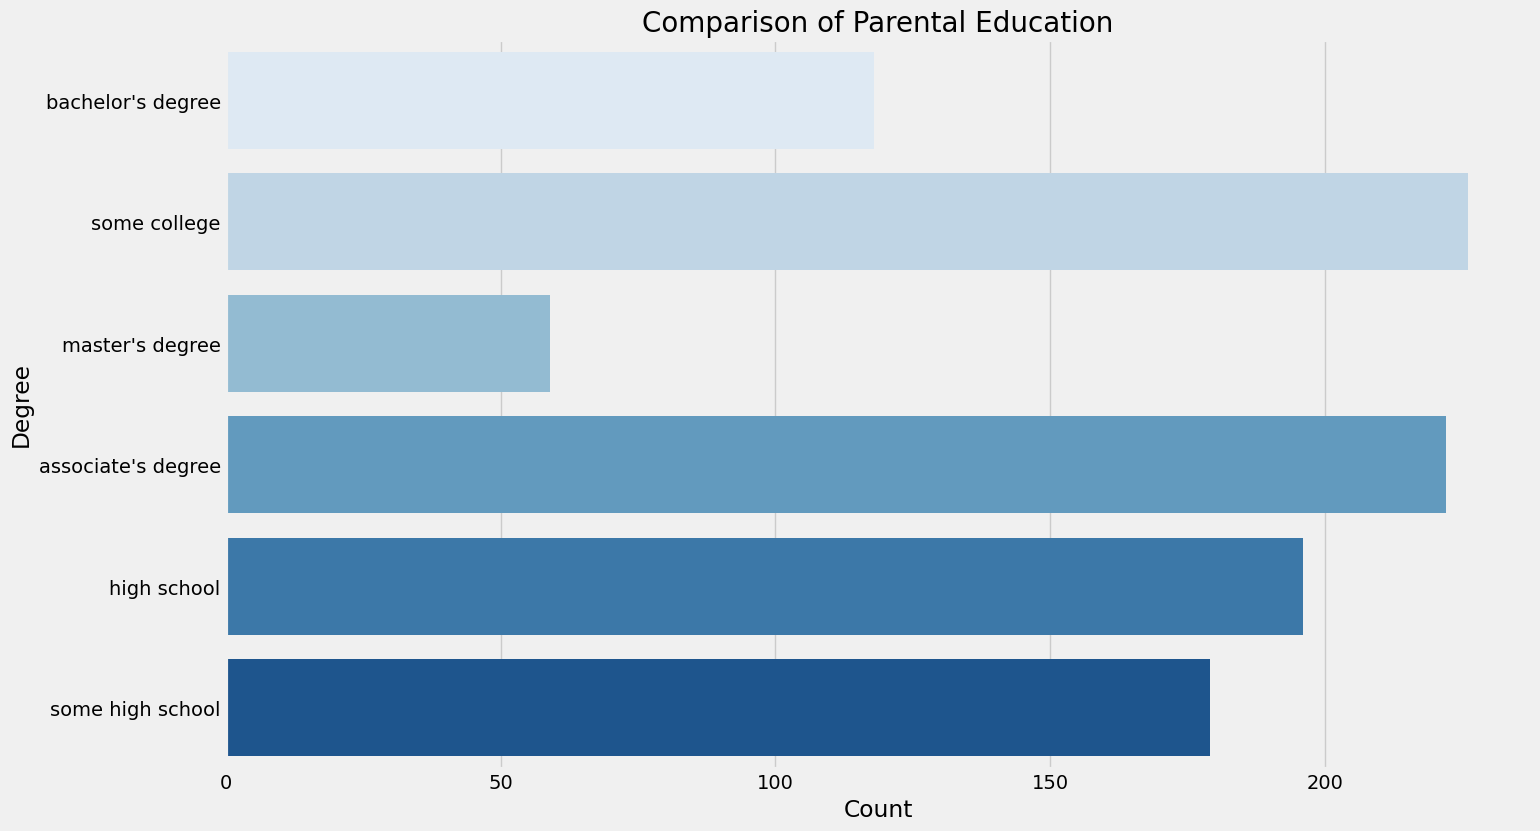

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
'''
This is a Seaborn count plot, which:
Counts how many times each unique value appears in the column 'parental level of education'.
Displays the result as bars.
palette='Blues' means the bars will be different shades of blue.'''
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

## Insights:
* Largest Number of parents are from "some college"

#### BIVARIATE ANALYSIS ( Does parental education have any impact on student's performance ? )

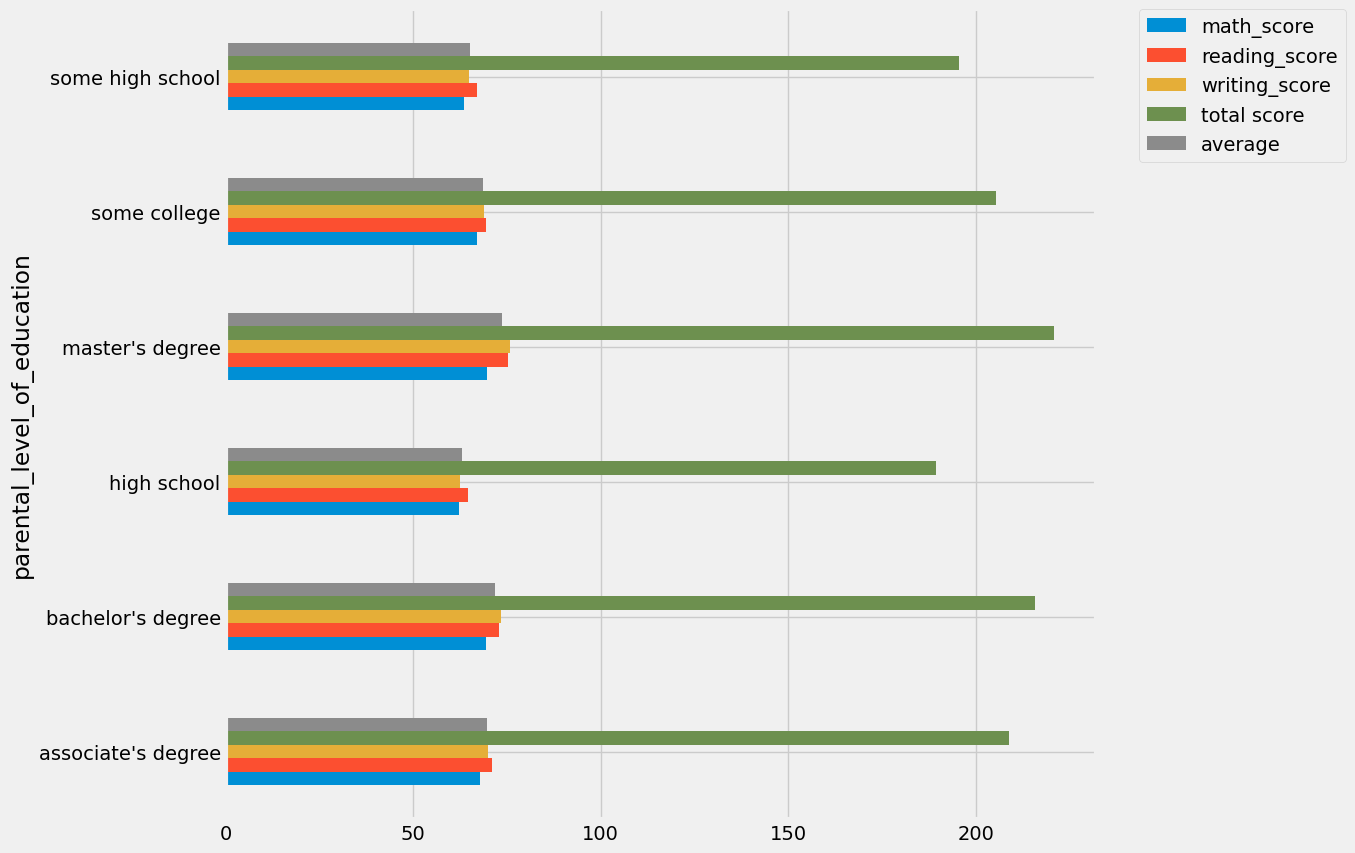

In [36]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10,10)) #only take numeric values so we did .mean(num==true)
'''.plot(kind='barh', figsize=(10,10))
This plots the result as a horizontal bar chart (kind='barh'), with a 10x10 inch figure size for clarity and space.
'''
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

## 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

## UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

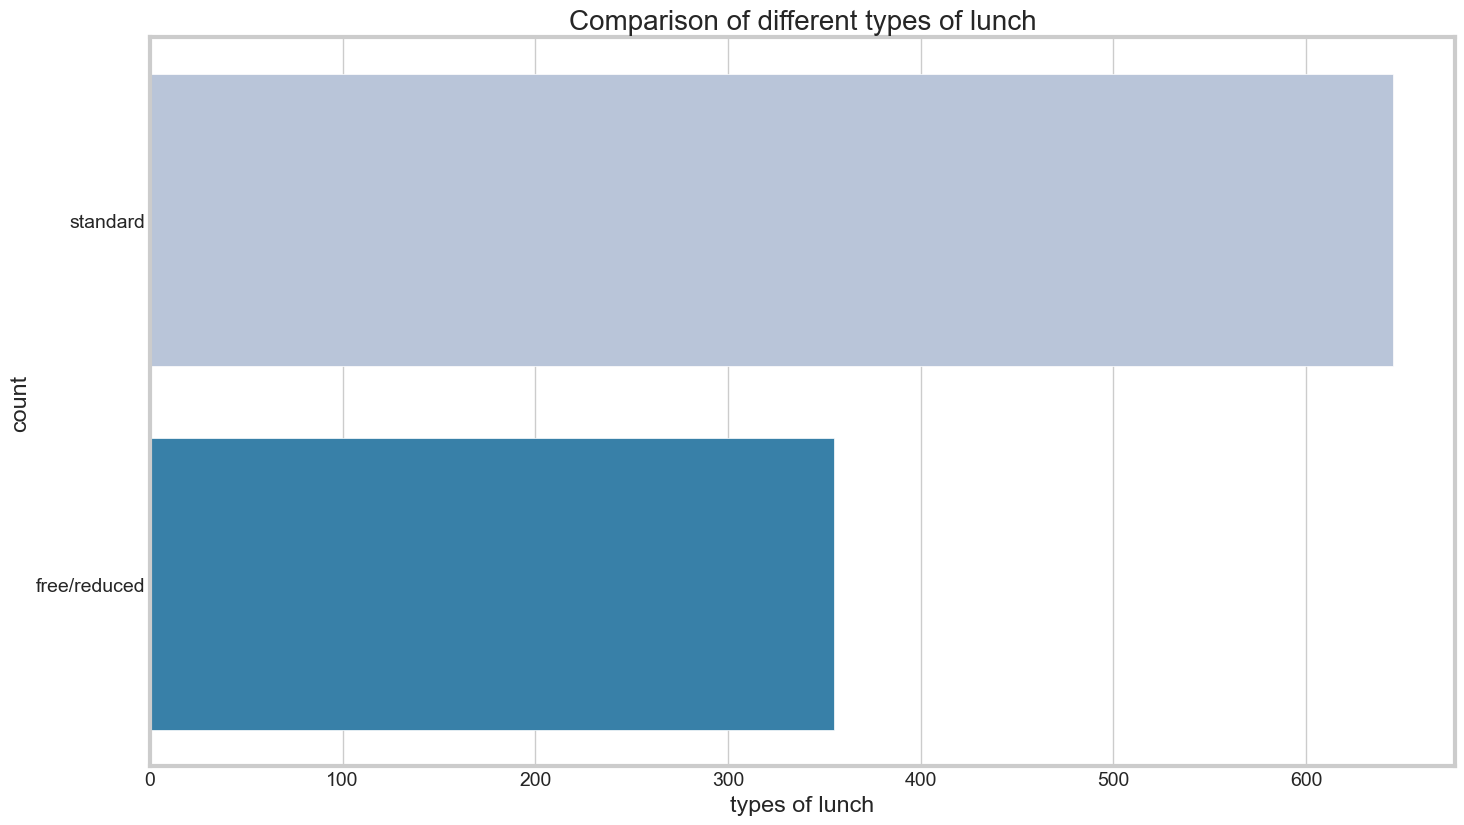

In [37]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style('whitegrid')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights 
- Students being served Standard lunch was more than free lunch

## BIVARIATE ANALYSIS (  Does lunch type intake have any impact on student's performance ? )

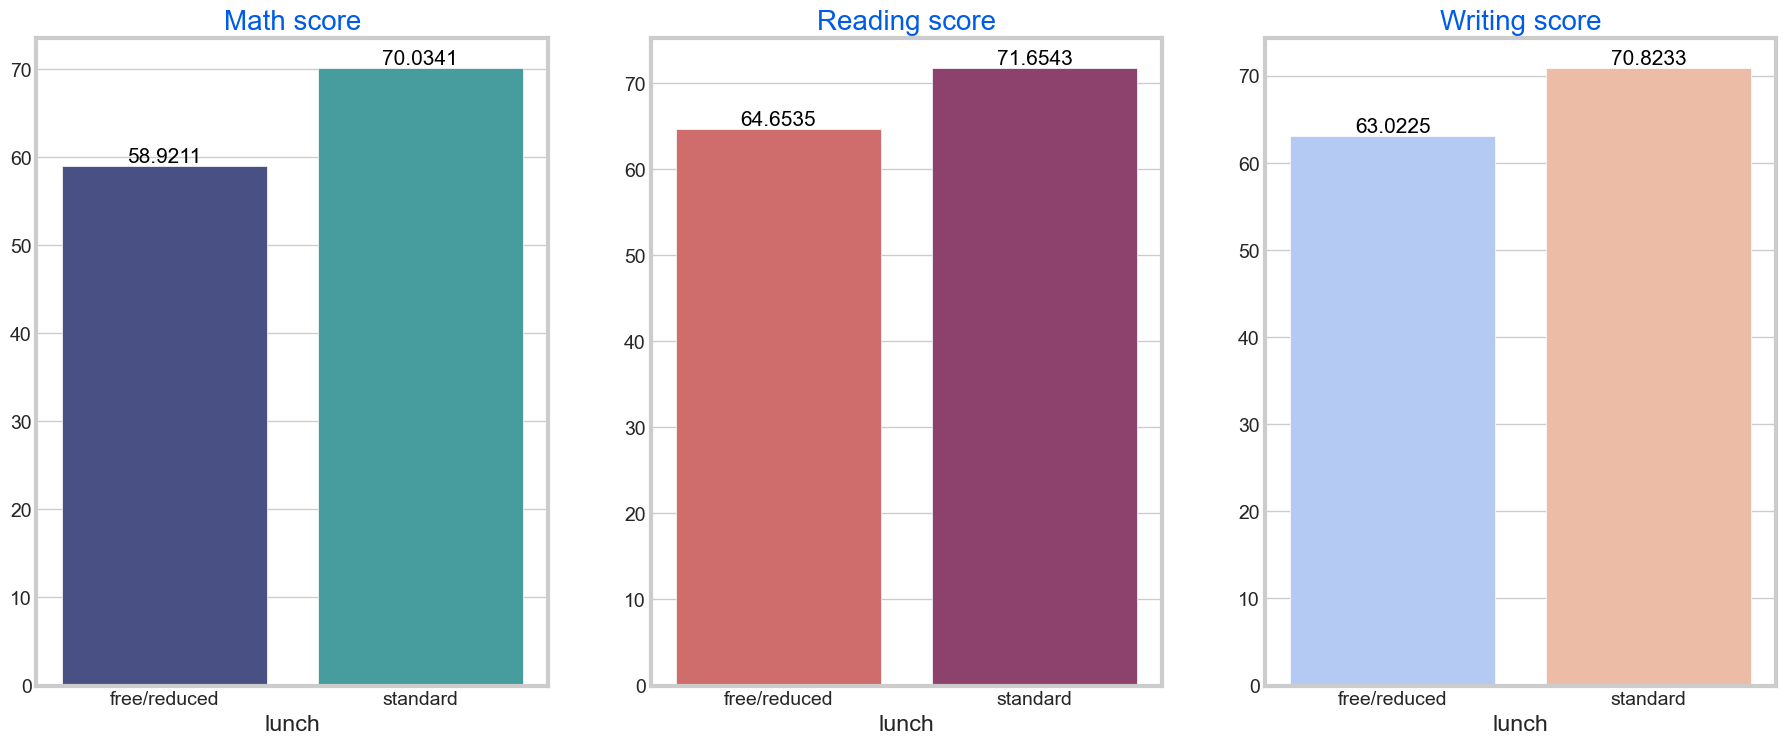

In [38]:
Group_data2=df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# Insights:
- Students with Standard Lunch performed better

## 4.4.5 TEST PREPARATION COURSE COLUMN 
- Does Test prepration course have any impact on student's performance ?

### BIVARIATE ANALYSIS ( Does Test prepration course has any impact on student's performance ? )

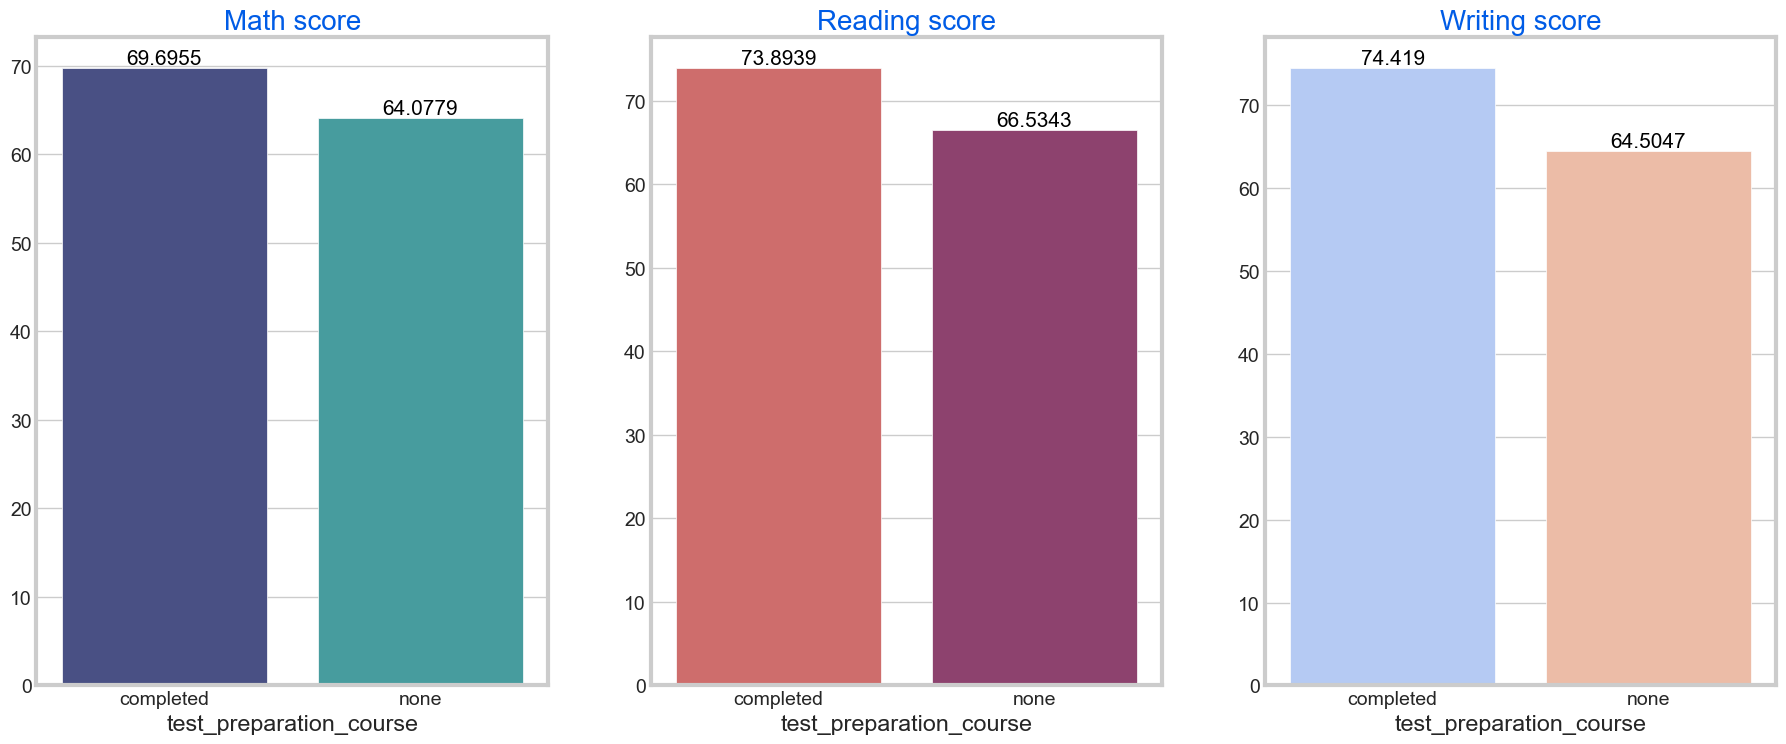

In [39]:
Group_data2=df.groupby('test_preparation_course')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights:
- Students who have completed the course tend to perform better

## 4.4.6 CHECKING OUTLIERS

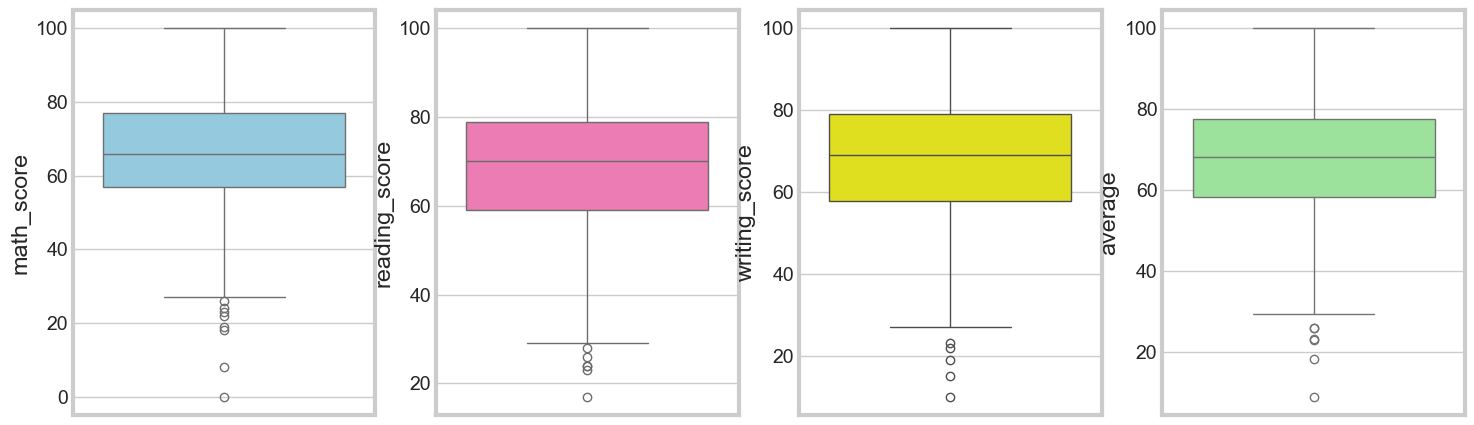

In [40]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## Multivariate Analysis using Pair Plot

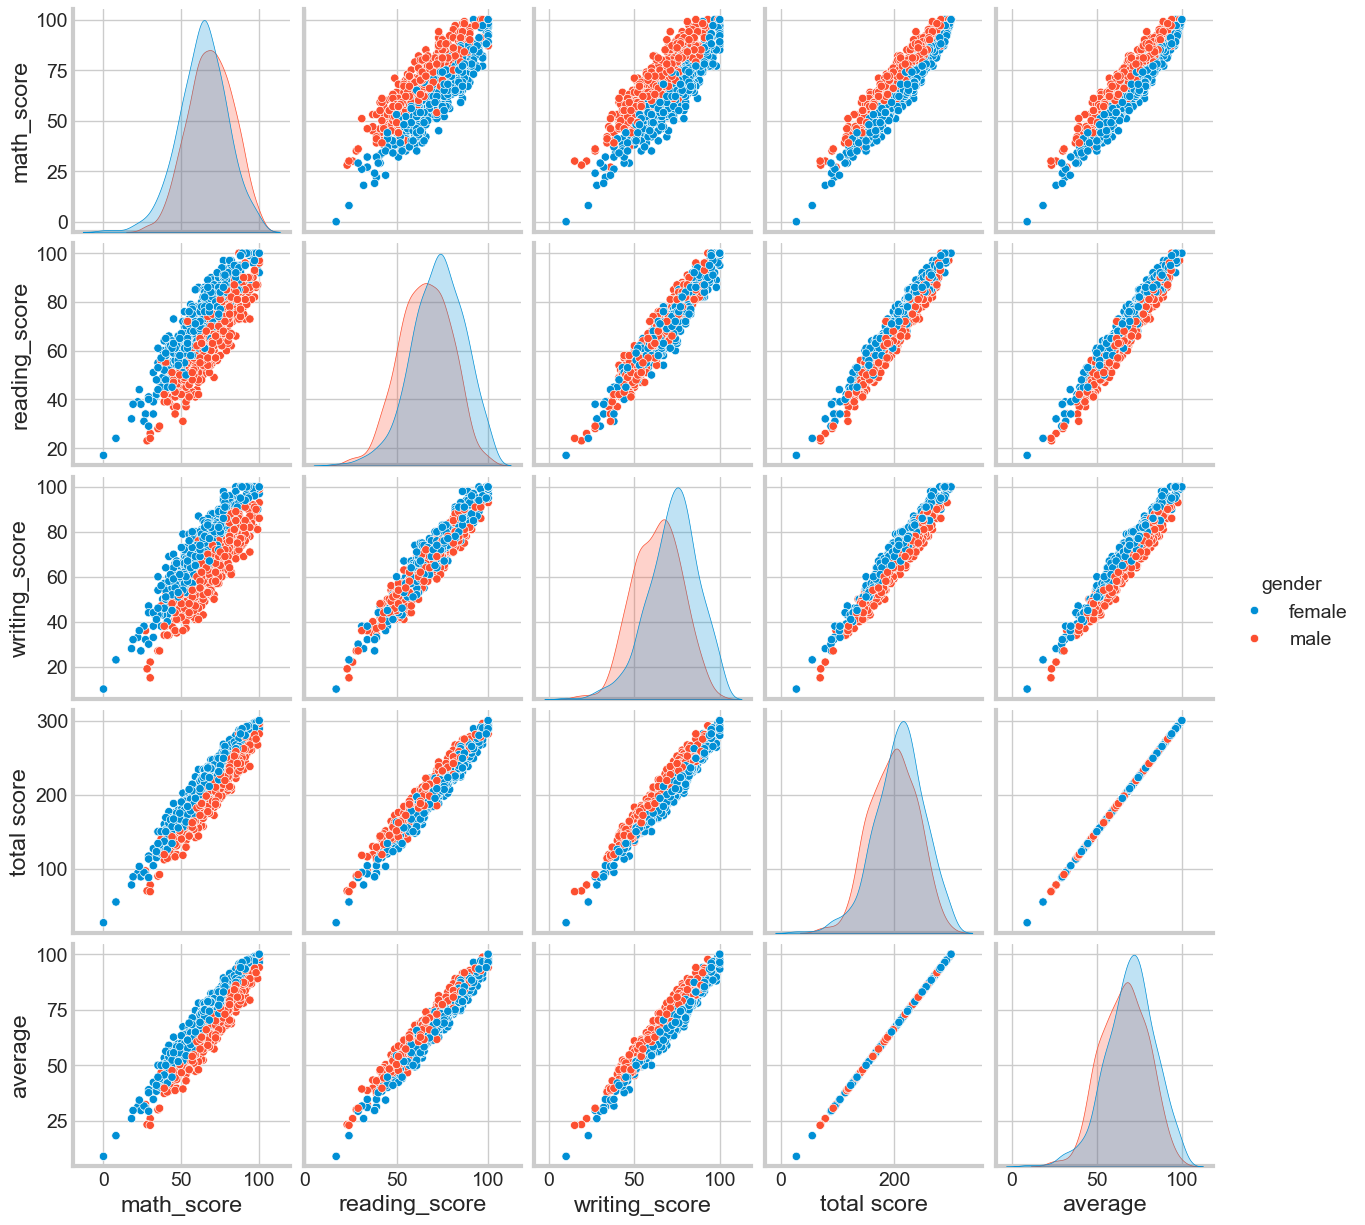

In [41]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Finishing preparation course is benefitial.